## MNIST Number Classification
MNIST Number Classification

In [17]:
# Import Libraries
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# Setup tensorflow GPUs
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

# pandas chained assignment
pd.options.mode.chained_assignment = None 


#### Load the MNIST Dataset from keras

In [18]:
# Import the MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print( f'Training Images Shape {train_images.shape}' )
print( f'Test Images Shape {test_images.shape}' )

Training Images Shape (60000, 28, 28)
Test Images Shape (10000, 28, 28)


##### Example of the MNIST Data

Image Label of 9


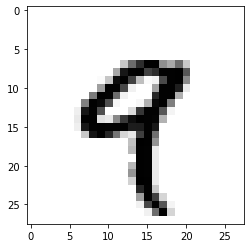

In [19]:
print( f'Image Label of {train_labels[4]}' )
digit = train_images[4]
plt.imshow( digit, cmap=plt.cm.binary )
plt.show()

#### Create the Deep Neural Network
Create a Deep Neural Network with 512 nodes in a dense layer and 10 as the output for the 10 classes

In [26]:
# Model
model = keras.Sequential( [ 
    layers.Dense( 512, activation='relu' ),
    layers.Dense( 10, activation='softmax' )
    ] )

# Compiler
model.compile(  optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'] )


#### Prepare the Images

In [27]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

#### Fit the Model and Determine the Weights

In [29]:
model.fit(train_images, train_labels, epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0161 - accuracy: 0.9953
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0127 - accuracy: 0.9965
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0098 - accuracy: 0.9975
Epoch 6/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0079 - accuracy: 0.9978
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 8/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0050 - accuracy: 0.9986
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0040 - accuracy: 0.9989
Epoch 10/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0030 - accura

#### Evaluate the Accuracy

In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print( f'Test Accuracy: {test_acc}' )

313/313 [==============================] - 2s 7ms/step - loss: 0.1566 - accuracy: 0.9831
Test Accuracy: 0.9830999970436096


#### Obtain the Weights of the Model

In [36]:

for layer in model.layers:
    weights = layer.get_weights()
    print( f'Weights: { weights[0].tolist() }')


AttributeError: 'list' object has no attribute 'tolist'